In [1]:
# import library, pandas to read the dataset, matplotlib to visualize data, and re to clean the text 
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'jpeg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline
# To remove tag e from describe
pd.set_option("display.float_format",lambda x :"%05f"%x)

In [2]:
# read data stored in file name Car-details.csv using pd.read_csv, then store the data in df dataframe
df = pd.read_csv('Car-details.csv')

In [3]:
#show first ten dataframe content 
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000000
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.000000
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.000000
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.000000
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.000000
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.000000


In [32]:
# explore the data type at each series
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [33]:
# check to null values 
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [34]:
# Drop nul values and save in memory
df.dropna(subset=["engine","max_power","torque","seats"], inplace=True)

In [35]:
# check to null values after Drop nal values
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [36]:
# Drop columns mileage
df.drop('mileage', axis=1,inplace=True)

In [37]:
# check on columns 
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'engine', 'max_power', 'torque', 'seats'],
      dtype='object')

In [38]:
# Do you know how many cars are most popular on the market, diesel or petrol or CNG or LPG?
df['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

Text(0.5, 1.0, 'the fuel')

<Figure size 1080x720 with 0 Axes>

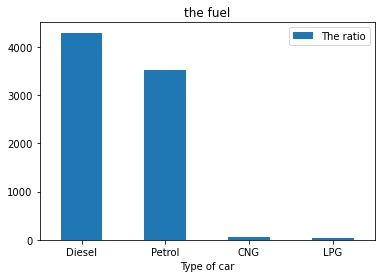

In [39]:
# Explanation of the result of the first question
plt.figure(figsize=(15,10))
df = pd.DataFrame({'Type of car':['Diesel','Petrol','CNG','LPG'], 'The ratio':[4299, 3520, 52, 35]})
df.plot.bar(x='Type of car', y='The ratio', rot=0)
plt.title('the fuel')

In [4]:
# Ensure the highest price value in cars
# ascending=False Ascending order of values
df.sort_values(['selling_price'],ascending=False)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0 kmpl,1969 CC,400 bhp,640Nm@ 1740rpm,4.000000
2938,BMW X7 xDrive 30d DPE,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.38 kmpl,2993 CC,265 bhp,620Nm@ 1500-2500rpm,7.000000
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.000000
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.000000
136,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Maruti 800 Std,2004,31504,110000,Petrol,Individual,Manual,Third Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.000000
5965,Maruti 800 Std,2000,31000,56194,Petrol,Individual,Manual,Fourth & Above Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.000000
2145,Maruti Zen LXI,2001,30000,10000,Petrol,Individual,Manual,First Owner,17.3 kmpl,993 CC,60 bhp,78Nm@ 4500rpm,5.000000
6776,Hyundai Santro GLS I - Euro I,2000,30000,90000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN


In [5]:
# Verify the number of Manual and automatic cars
df.transmission.value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

Text(0.5, 1.0, 'the transmission')

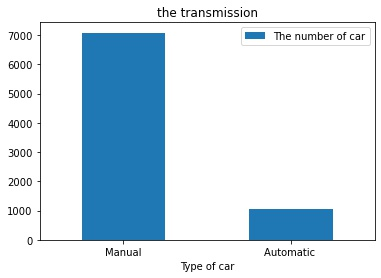

In [44]:
# Explanation of the result of the type of car Manual or automatic
df = pd.DataFrame({'Type of car':['Manual','Automatic '], 'The number of car':[7078, 1050,]})
df.plot.bar(x='Type of car', y='The number of car', rot=0)
plt.title('the transmission')